<a href="https://colab.research.google.com/github/EnisSah/fastai_image_classification_cats_family/blob/master/fastai_image_classification_cats_family_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fastai Image classification Wild Cats


In [2]:
from fastai.vision import *
import fastai; fastai.__version__
import numpy as np
import hashlib
# from scipy import imread, imresize, imshow
import matplotlib.pyplot as plt
from imageio import imread
import matplotlib.gridspec as gridspec
import time


#### Mounting images to Google Drive folder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Set path to root directory
path = Path('/content/drive/My Drive/cats_projekat')

#### Making a counter to sum all the images and directories

In [17]:
APP_FOLDER = '/content/drive/My Drive/cats_projekat'

totalImages = 0
totalDir = 0

for base, dirs, files in os.walk(APP_FOLDER):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalImages += 1

Searching in :  /content/drive/My Drive/cats_projekat
Searching in :  /content/drive/My Drive/cats_projekat/leopards
Searching in :  /content/drive/My Drive/cats_projekat/jaguars
Searching in :  /content/drive/My Drive/cats_projekat/tigers
Searching in :  /content/drive/My Drive/cats_projekat/panthers
Searching in :  /content/drive/My Drive/cats_projekat/cheetahs
Searching in :  /content/drive/My Drive/cats_projekat/models


In [18]:
print('Total number of images:',totalFiles-1)
print('Total Number of directories:',totalDir-1)


Total number of images 2815
Total Number of directories 5


You can see and download the dataset with this link:
https://drive.google.com/drive/folders/15awuVOT6DIODdQawrbD41iFf9fRFsl2e?usp=sharing 


You can also see the dataset here:
https://www.kaggle.com/enisahovi/cats-projekat-4

#### Removing duplicates in an image dataset

In [ ]:
from hashlib import md5

In [ ]:
def file_hash(filepath):
  with open (filepath, 'rb') as f:
    return md5(f.read()).hexdigest()


In [ ]:
import os

In [21]:
# checking the current working dirrectory
os.getcwd()

'/content/drive/My Drive/cats_projekat/leopards'

In [28]:
# change dirrectory
os.chdir('/content/drive/My Drive/cats_projekat/jaguars')
os.getcwd()

'/content/drive/My Drive/cats_projekat/jaguars'

In [29]:
# check how many files are there in the foler
files_list = os.listdir()
print(len(files_list))

572


In [30]:
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))

In [31]:
duplicates

[(111, 6),
 (198, 44),
 (215, 54),
 (218, 82),
 (219, 38),
 (221, 55),
 (223, 53),
 (239, 59),
 (240, 142),
 (245, 157),
 (248, 122),
 (251, 173),
 (274, 188),
 (289, 43),
 (295, 189),
 (297, 167),
 (298, 106),
 (299, 33),
 (301, 148),
 (305, 191),
 (318, 162),
 (321, 186),
 (356, 184),
 (358, 67),
 (359, 123),
 (361, 150),
 (370, 64),
 (380, 138),
 (381, 75),
 (390, 109),
 (391, 45),
 (394, 57),
 (395, 28),
 (402, 153),
 (406, 168),
 (408, 190),
 (424, 41),
 (425, 52),
 (426, 79),
 (427, 114),
 (429, 139),
 (434, 110),
 (447, 127),
 (448, 5),
 (456, 154),
 (461, 65),
 (464, 89),
 (468, 152),
 (477, 25),
 (478, 68),
 (485, 179),
 (489, 177),
 (499, 21),
 (501, 23),
 (506, 32),
 (508, 98),
 (510, 101),
 (513, 27),
 (518, 38),
 (524, 17)]

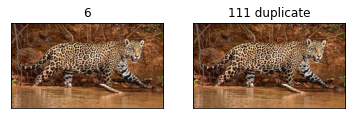

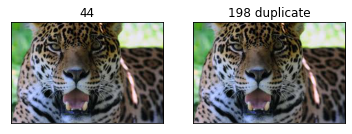

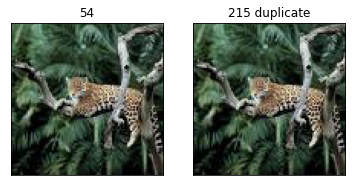

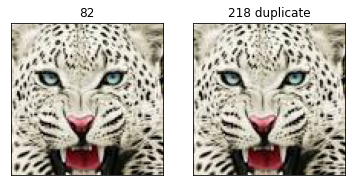

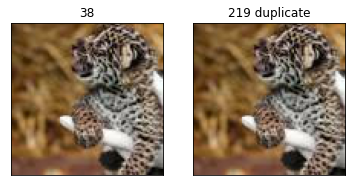

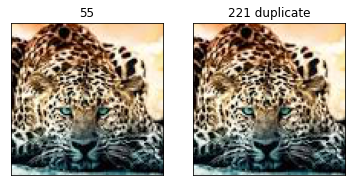

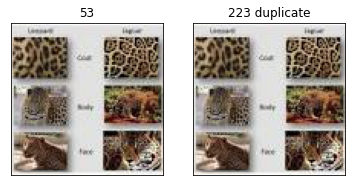

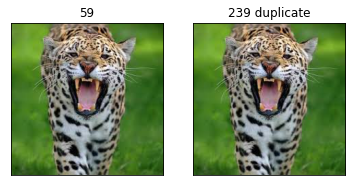

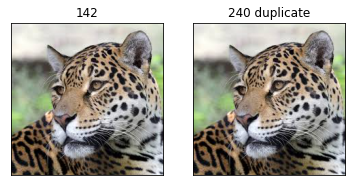

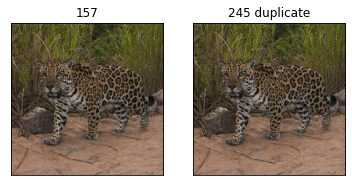

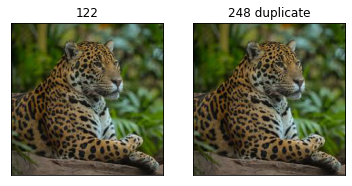

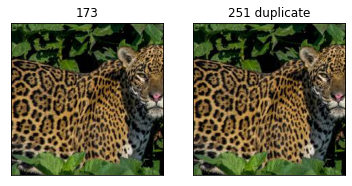

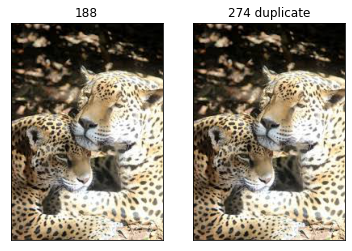

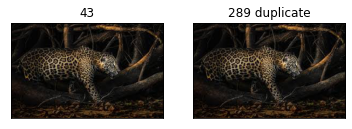

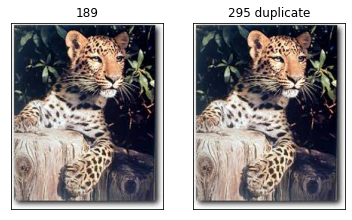

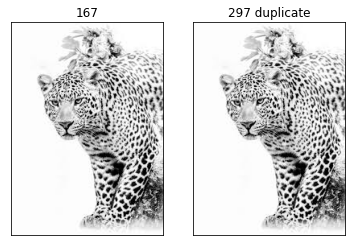

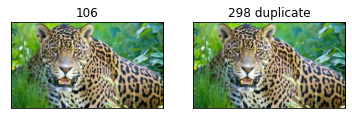

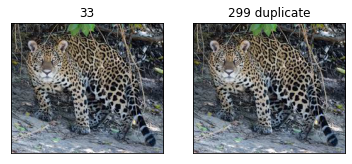

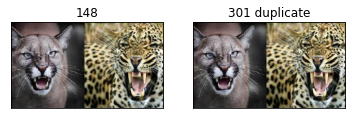

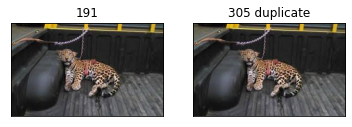

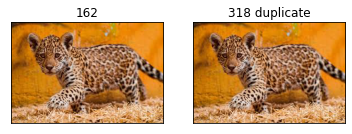

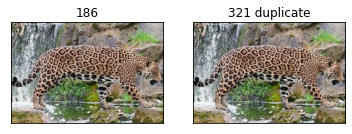

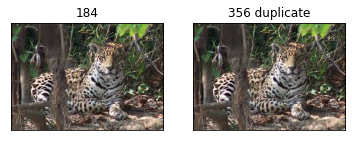

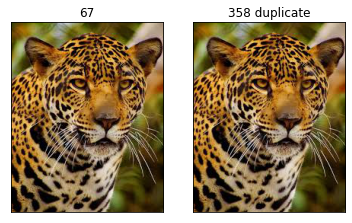

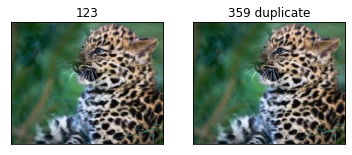

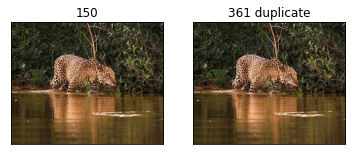

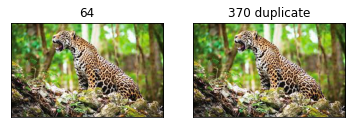

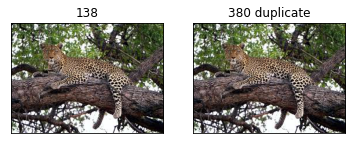

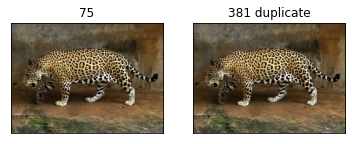

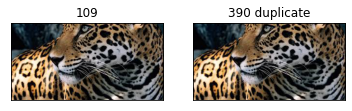

In [32]:

for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(files_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(files_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

#### Delete files after printing

In [33]:
for index in duplicates:
    os.remove(files_list[index[0]])

In [34]:
# check how many images left after deleting
files_list = os.listdir()
print(len(files_list))

512


In [37]:
# testing the number of images per each class
os.chdir('/content/drive/My Drive/cats_projekat/cheetahs')
files_list = os.listdir()
print(len(files_list))

565


### Continue with image checking


In [ ]:
# View all files in directory
path.ls()

[PosixPath('/content/drive/My Drive/cats_projekat/desktop.ini'),
 PosixPath('/content/drive/My Drive/cats_projekat/leopards'),
 PosixPath('/content/drive/My Drive/cats_projekat/jaguars'),
 PosixPath('/content/drive/My Drive/cats_projekat/tigers'),
 PosixPath('/content/drive/My Drive/cats_projekat/panthers'),
 PosixPath('/content/drive/My Drive/cats_projekat/cheetahs'),
 PosixPath('/content/drive/My Drive/cats_projekat/models')]

#### Classify images of cheetahs, jaguars, leopards, panthers, and tigers

In [ ]:
# We can verify that we don’t have any corrupt images using the verify_images method.



import os
# model_dir= ("/tmp/model/")
# path = Path('../input/cats-projekat-4/cats_projekat')
for folder in ('cheetahs', 'jaguars', 'leopards','panthers','tigers'):
    
        print(folder)
        verify_images(os.path.join(path, folder), delete=True, max_size=1000)
 

cheetahs


jaguars


leopards


panthers


tigers


In [ ]:
# must be called to handle pop-up warnings 
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [ ]:
# ImageDataBunch tells that our data set contains images in the path
# valid_pct (or validation set) uses 0.33% of the data and not use it for training, instead it uses it for telling
# the error rate of the model
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=path, valid_pct=0.33,
                                  ds_tfms=get_transforms(),bs=4 ,size=500, num_workers=0).normalize(imagenet_stats)
# Setting num_workers=0 prevents crushing!

In [ ]:
data.classes

['cheetahs', 'jaguars', 'leopards', 'panthers', 'tigers']

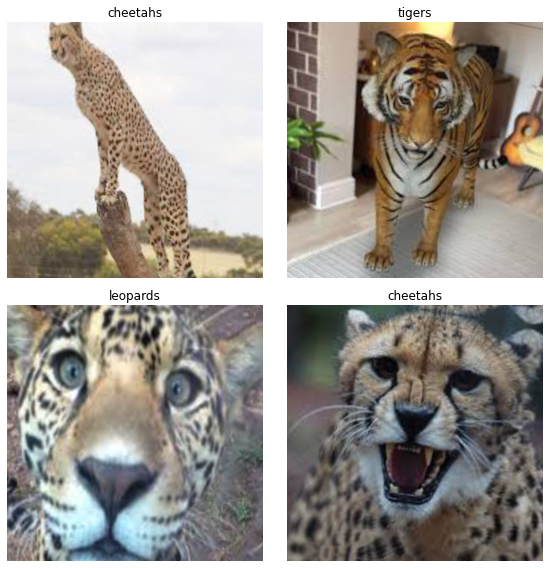

In [ ]:
data.show_batch (nrows=3, ncols=3)
# data.show_batch(rows=5, figsize=(7, 8))

## Using AlexNet

In [ ]:
# AlexNet contained eight layers; the first five were convolutional layers, some of them followed by max-pooling layers, and the last three were fully connected layers.
from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.alexnet, metrics=accuracy)


# By default, only the fully connected layers at the top are unfrozen (can be trained), 
# which if you are familiar with transfer learning makes perfect sense.

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
# defaults.device = torch.device('cuda') # makes sure the gpu is used
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

learn.fit_one_cycle(8)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 6.92E-07


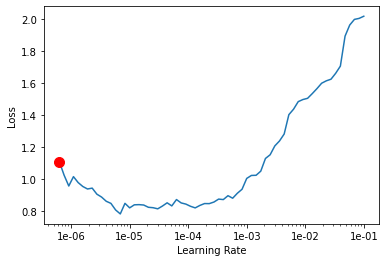

In [ ]:
# Will take too long without GPU
learn.model_dir='/kaggle/working/'
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

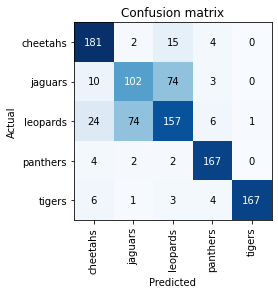

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


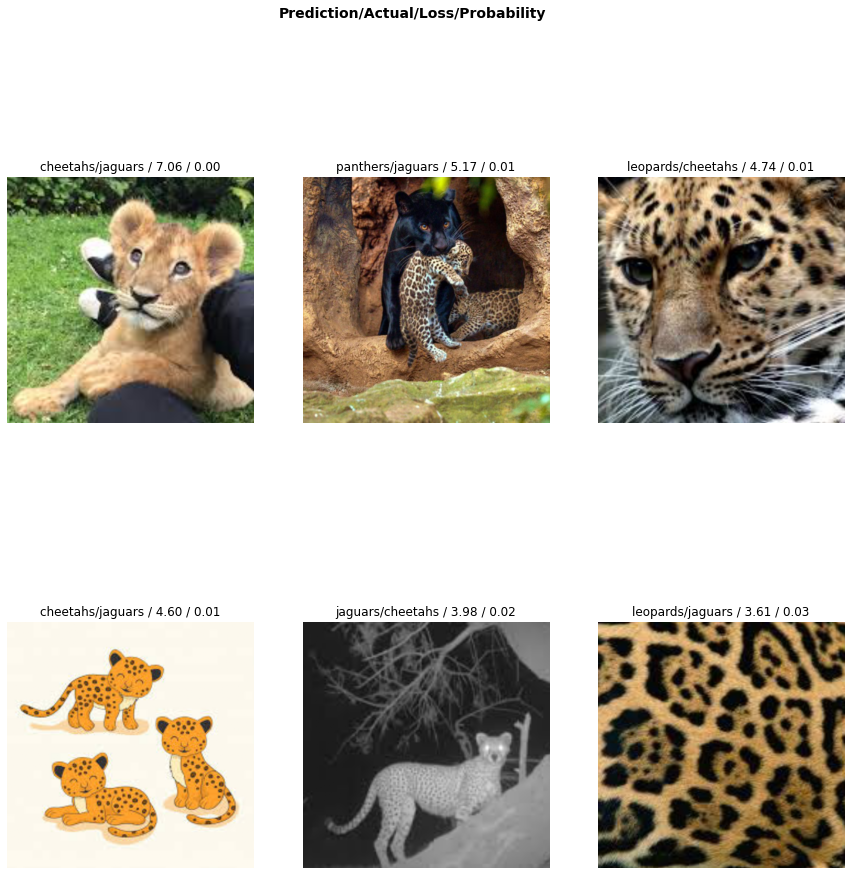

In [ ]:

interp.plot_top_losses(6, figsize=(15,15))
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.


In [ ]:

# from fastai2.vision.widgets import *


In [ ]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner
# no fastai widgets are working in Colab


## Using Densenet161


In [ ]:
# here we need to set batch size to 4 to prevent RunTime Error (CUDA)
# num_workers equal 0 means that it’s the main process that will do the data loading when needed,
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=path, valid_pct=0.33,
                                  ds_tfms=get_transforms(),bs=4 ,size=500, num_workers=0).normalize(imagenet_stats)

In [ ]:
# here we are using resnet 50 which is using 50 layers insted of 34

torch.cuda.empty_cache()

from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.densenet161, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


In [ ]:
# defaults.device = torch.device('cuda') # makes sure the gpu is used
# import torch
torch.cuda.empty_cache()


learn.fit_one_cycle(8)

In [ ]:
#get a deeper insight into the alloaction of memory in gpu is to use
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  187429 KB |    9958 MB |   65967 GB |   65967 GB |\n|       from large pool |  127262 KB |    9902 MB |   63110 GB |   63109 GB |\n|       from small pool |   60167 KB |      95 MB |    2857 GB |    2857 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |  187429 KB |    9958 MB |   65967 GB |   65967 GB |\n|       from large pool |  127262 KB |    9902 MB |

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 7.59E-08


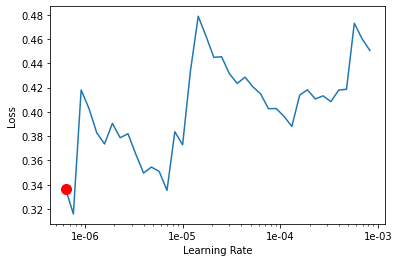

In [ ]:
# Will take too long without GPU
learn.model_dir='/kaggle/working/'
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-5))

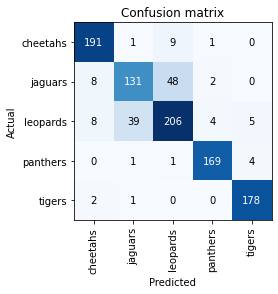

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

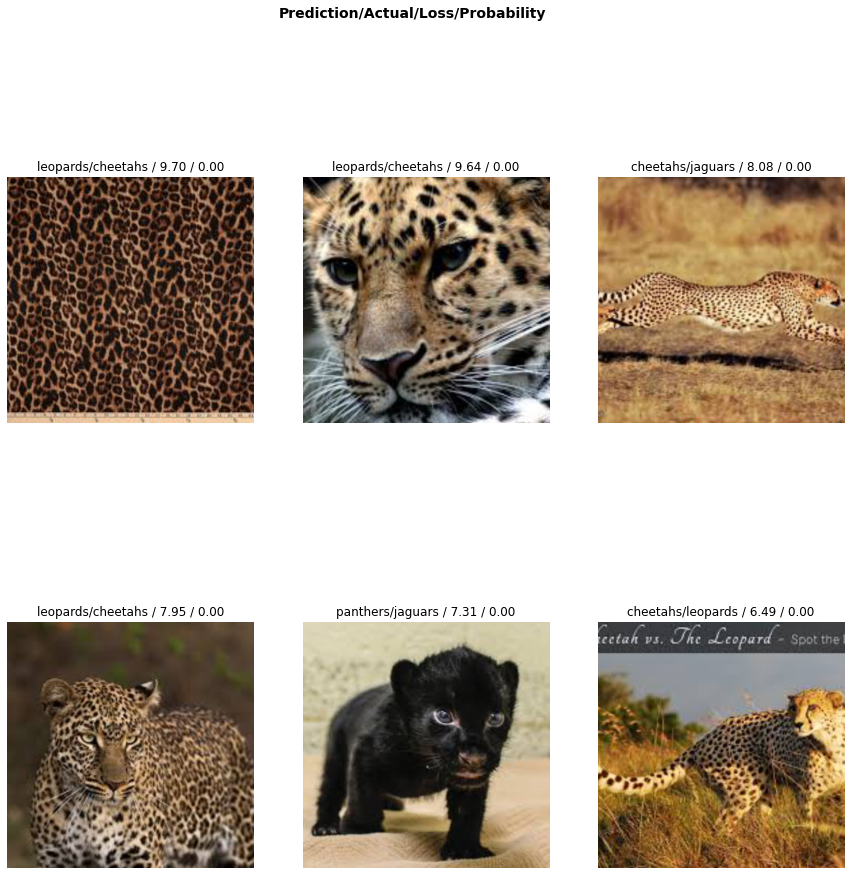

In [ ]:

interp.plot_top_losses(6, figsize=(15,15))
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.

## Using Vgg19_bn

In [ ]:
# here we need to set batch size to 4 to prevent RunTime Error (CUDA)
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=path, valid_pct=0.33,
                                  ds_tfms=get_transforms(),bs=10 ,size=500, num_workers=0).normalize(imagenet_stats)

In [ ]:
# VGG-19 is a convolutional neural network that is 19 layers deep

from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.vgg19_bn, metrics=accuracy)

# The created model uses the resnet50 architecture, with weights pretrained on the imagenet dataset.
# By default, only the fully connected layers at the top are unfrozen (can be trained), 
# which if you are familiar with transfer learning makes perfect sense.

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


In [ ]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
import torch
torch.cuda.empty_cache()
learn.fit_one_cycle(8)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 6.31E-08


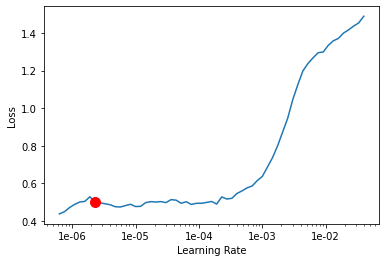

In [ ]:
# Will take too long without GPU
learn.model_dir='/kaggle/working/'
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

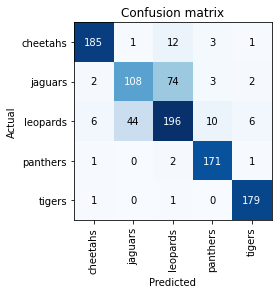

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


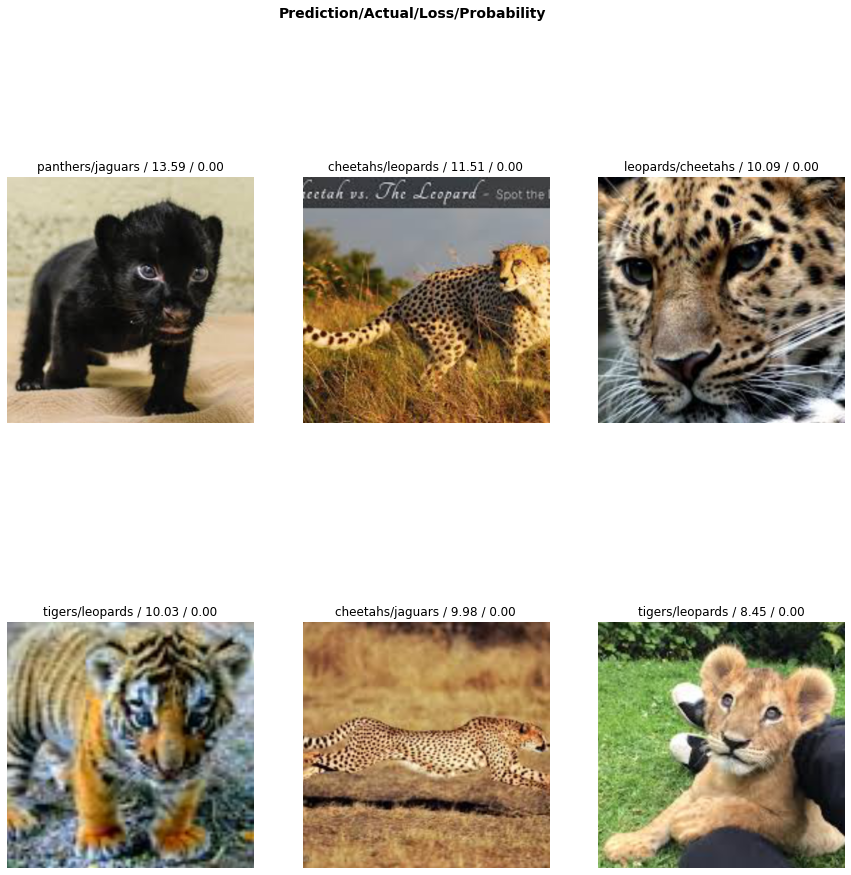

In [ ]:


interp.plot_top_losses(6, figsize=(15,15))
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.

## Using ResNet50




In [ ]:
# here we are using resnet 50 which is using 50 layers insted of 34

from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

# The created model uses the resnet50 architecture, with weights pretrained on the imagenet dataset.
# By default, only the fully connected layers at the top are unfrozen (can be trained), 
# which if you are familiar with transfer learning makes perfect sense.

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
# defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(8)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-05
Min loss divided by 10: 7.59E-08


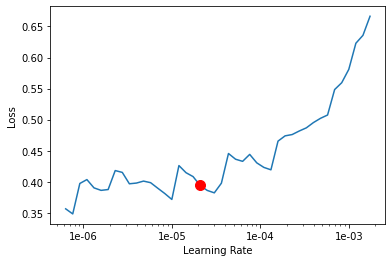

In [ ]:
# Will take too long without GPU
learn.model_dir='/kaggle/working/'
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-6))

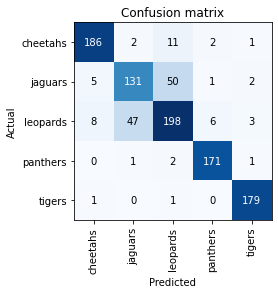

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


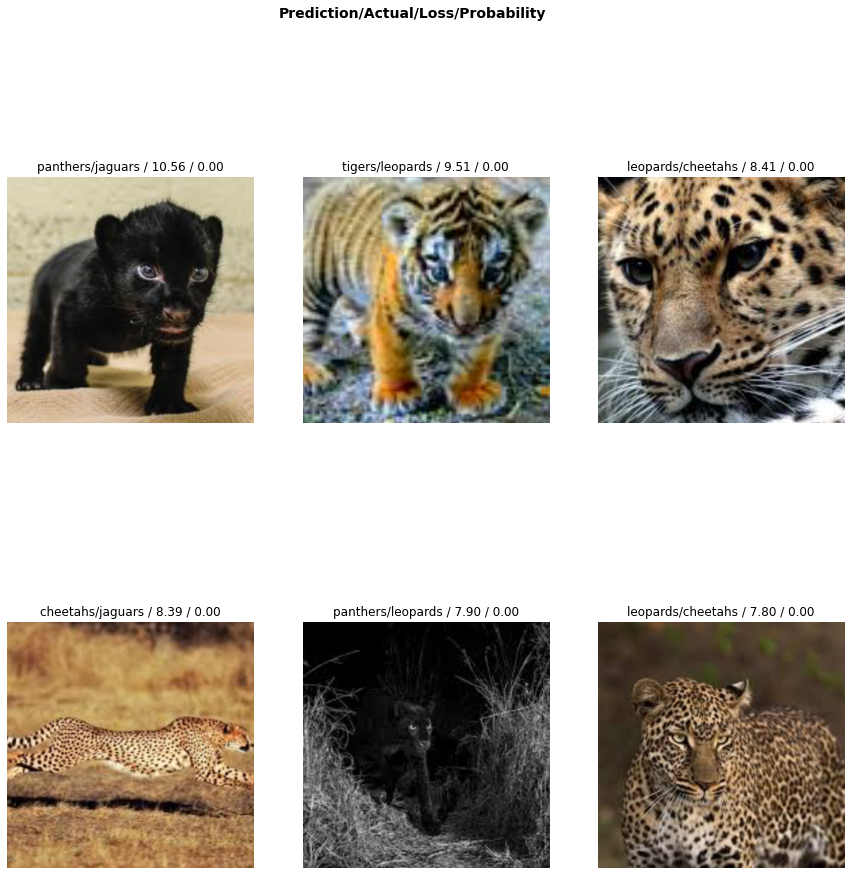

In [ ]:


interp.plot_top_losses(6, figsize=(15,15))
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.

## Using Resnet34


In [ ]:
# here we are using resnet34 which is using 34 layers

from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=accuracy)
# The created model uses the resnet50 architecture, with weights pretrained on the imagenet dataset.
# By default, only the fully connected layers at the top are unfrozen (can be trained), 
# which if you are familiar with transfer learning makes perfect sense.

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(8)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.58E-07


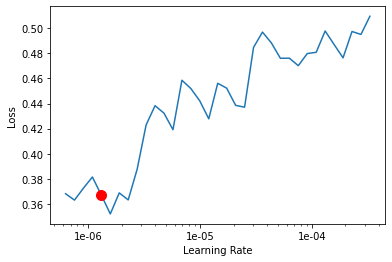

In [ ]:
# Will take too long without GPU
learn.model_dir='/kaggle/working/'
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(3e-6, 3e-5))

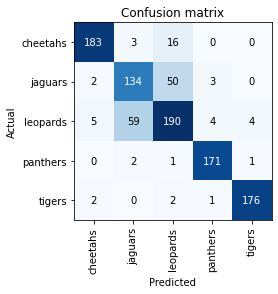

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


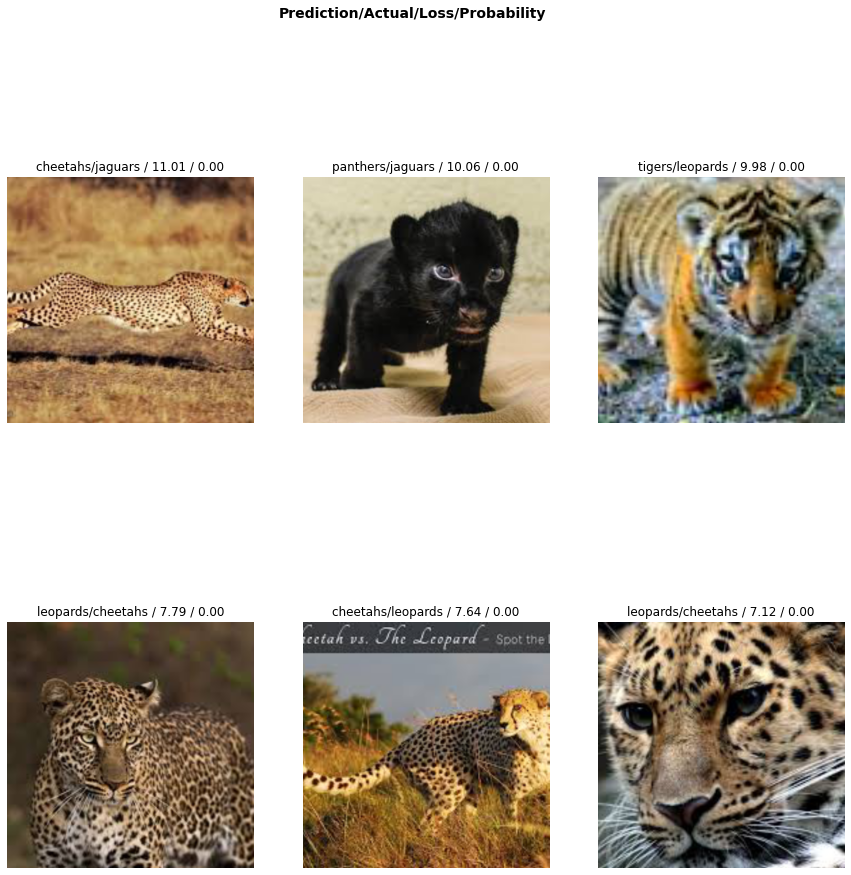

In [ ]:


interp.plot_top_losses(6, figsize=(15,15))
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.

## Using ResNet152

In [ ]:
# here we are using resnet 152 which is using 152 layers

from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet152, metrics=accuracy)
# The created model uses the resnet50 architecture, with weights pretrained on the imagenet dataset.
# By default, only the fully connected layers at the top are unfrozen (can be trained), 
# which if you are familiar with transfer learning makes perfect sense.

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


In [ ]:
# defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(8)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-05
Min loss divided by 10: 2.75E-05


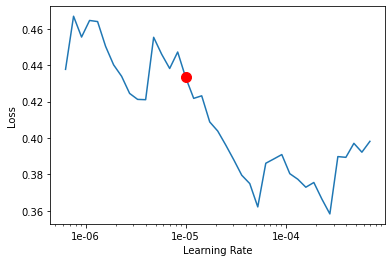

In [ ]:
# Will take too long without GPU
learn.model_dir='/kaggle/working/'
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1.10E-04))

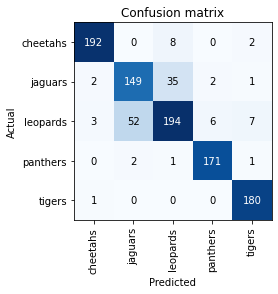

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


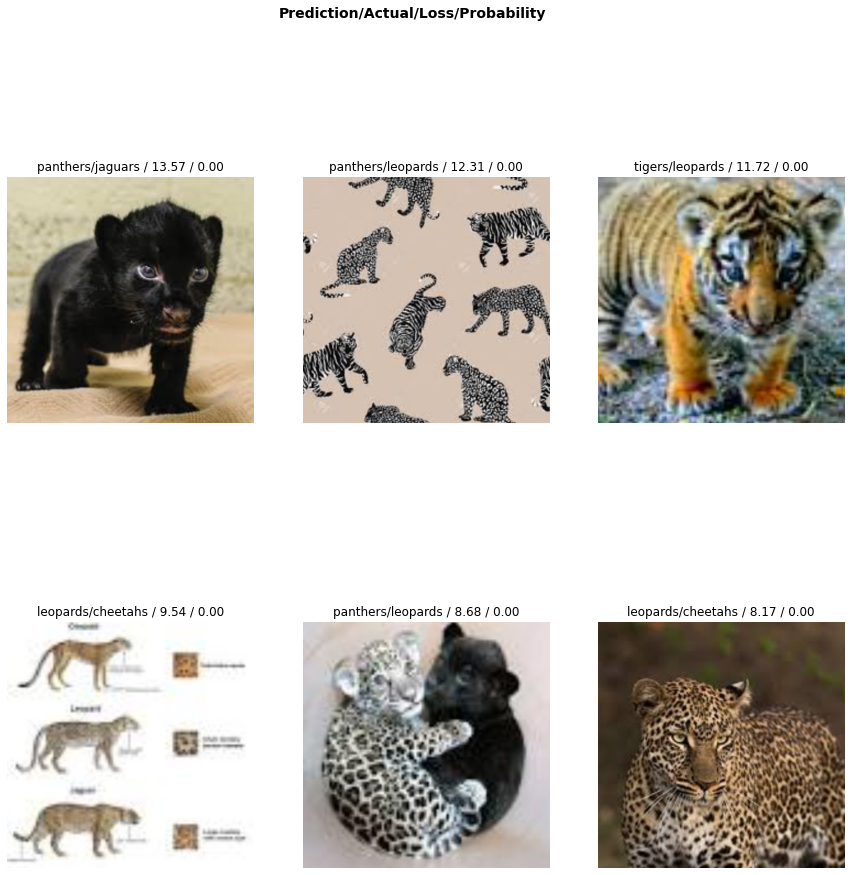

In [ ]:
interp.plot_top_losses(6, figsize=(15,15))
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.

### saving 


In [ ]:
learn.save('..animal-detection-stage-1')

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 250, 250]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 250, 250]       128        True      
______________________________________________________________________
ReLU                 [64, 250, 250]       0          False     
______________________________________________________________________
MaxPool2d            [64, 125, 125]       0          False     
______________________________________________________________________
Conv2d               [64, 125, 125]       4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 125, 125]       128        True      
______________________________________________________________________
Conv2d               [64, 125, 125]       36,864     True      
___________________________________________________

##Models comparison and conclusion


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving image_classification_results.xlsx to image_classification_results.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['image_classification_results.xlsx']))
df

model  train_loss  valid_loss  accuracy      time
0    ResNet152    0.310080    0.378008  0.881070  05:46:00
1  Densenet161    0.487178    0.384937  0.877106  07:12:00
2     ResNet50    0.387719    0.400522  0.857284  04:16:00
3     ResNet34    0.403808    0.428276  0.854311  03:23:00
4     Vgg19_bn    0.575057    0.470681  0.833499  06:30:00
5      AlexNet    0.791767    0.573446  0.777998  02:33:00